In [5]:
from nlp_tasks.text_similarity.ts import similarity_matrix, visualize_similarities
from nlp_tasks.text2image.t2i import generate_image
from nlp_tasks.translation.tl import translate
from nlp_tasks.named_entity_recognition.ner import named_entity_recognition
from nlp_tasks.zero_shot_classification.zsc import zs_class
from nlp_tasks.language_detection.ld import detect_language
from nlp_tasks.summarization.sum import summarize

In [6]:
text = "Das ist das Haus vom Nikolaus. Und nebenan das Haus vom Weihnachtsmann. Es hat große Fenster und einen Balkon. Hubert wohnt auch hier am Nordpol in direkter Nachbarschaft. Hubert ist bei der Winterweihnachtswunder GmbH angestellt."

In [7]:
l = detect_language(text)
print(l)
assert l[0] == "de", "models are partly multilingual, partly german only. Make sure you know what the models are capable of before you continue :)"

('de', 0.9936065673828125)


In [8]:
candidate_labels = ["Weihnachten", "Ostern", "Architektur", "Grmüse", "Technikfolgenabschätzung"]
zs_class(candidate_labels, text)

,labels,scores
0,Weihnachten,0.586354
1,Architektur,0.410380
2,Grmüse,0.001913
3,Technikfolgenabschätzung,0.000755
4,Ostern,0.000599


In [9]:
l, p, o = named_entity_recognition(text)
print(l)
print(p)
print(o)

       Ort     Score
0  Nordpol  0.994388
   Person     Score
0  Hubert  0.999437
1  Hubert  0.999502
                  Organisation    Score
0  Winterweihnachtswunder GmbH  0.99981


In [12]:
sum_de = summarize(text)
sum_de

'Haus vom Nikolaus und Weihnachtsmann'

In [13]:
text_en = translate("de", "en", text)
sum_en = translate("de", "en", sum_de)
text_fr = translate("de", "fr", text)
print(text_en)
print()
print(sum_en)
print()
print(text_fr)

This is the house of Santa Claus. And next door the house of Santa Claus. It has large windows and a balcony. Hubert also lives here at the North Pole in the immediate vicinity. Hubert is employed by Winter Weihnachtswunder GmbH.

House of Santa Claus and Santa Claus

C'est la maison de Nikolaus. Et à côté de la maison du Père Noël. Il a de grandes fenêtres et un balcon. Hubert habite ici aussi au pôle Nord dans le voisinage direct. Hubert est employé à Winterwehnachtsmirder GmbH.


In [14]:
from IPython.display import Image

text = sum_en
img_path = generate_image(text)

Image(filename=img_path) 

 14%|█▎        | 7/51 [02:55<18:29, 25.22s/it]

[[0.12586963 0.05674172 0.0557375  0.08626597]
 [0.10314295 0.00984074 0.08277045 0.07586325]
 [0.10084369 0.06740952 0.92606282 0.75211191]]


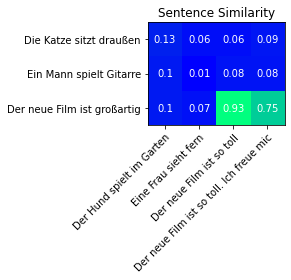

In [10]:

sentences1 = [text,
            "Tony hat Geburtstag.",
            'Der neue Film ist großartig']

sentences2 = ['Die Häuslichen Verhältnisse des weihnachtlichen Geschenkebringers.',
            "Eine Frau sieht fern",
            'Der neue Film ist so toll',
            'Der neue Film ist so toll. Ich freue mich.']

similarities = similarity_matrix(sentences1, sentences2)
print(similarities)
visualize_similarities(similarities, sentences1, sentences2)